### Set up the environment

In [100]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

### 1. Acquire titanic data

In [2]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
titanic.shape

(891, 13)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


### 2. Prepare titanic dataset

In [5]:
train, validate, test = prepare.prep_titanic(titanic)

In [6]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0


In [8]:
train.shape

(497, 14)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  497 non-null    int64  
 1   survived      497 non-null    int64  
 2   pclass        497 non-null    int64  
 3   sex           497 non-null    object 
 4   age           497 non-null    float64
 5   sibsp         497 non-null    int64  
 6   parch         497 non-null    int64  
 7   fare          497 non-null    float64
 8   embarked      497 non-null    object 
 9   class         497 non-null    object 
 10  embark_town   497 non-null    object 
 11  alone         497 non-null    int64  
 12  embarked_Q    497 non-null    uint8  
 13  embarked_S    497 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(2)
memory usage: 51.4+ KB


In [10]:
train.nunique()

passenger_id    497
survived          2
pclass            3
sex               2
age              80
sibsp             7
parch             6
fare            186
embarked          3
class             3
embark_town       3
alone             2
embarked_Q        2
embarked_S        2
dtype: int64

In [11]:
train = train[['survived', 'class', 'sex', 'age', 'fare', 'embark_town', 'alone']]

train.head()

,survived,class,sex,age,fare,embark_town,alone
583,0,First,male,36.0,40.1250,Cherbourg,1
337,1,First,female,41.0,134.5000,Cherbourg,1
50,0,Third,male,7.0,39.6875,Southampton,0
218,1,First,female,32.0,76.2917,Cherbourg,1
31,1,First,female,24.0,146.5208,Cherbourg,0


In [12]:
train.nunique()

survived         2
class            3
sex              2
age             80
fare           186
embark_town      3
alone            2
dtype: int64

**Notes**
- Target var: survived (categorical)
- Other vars: 
    - class (categorical)
    - sex (categorical)
    - age (continuous)
    - fare (continuous)
    - embark_town (categorical)
    - alone (categorical)

### 3-1. Exploring the Target by itself - Target is a categorical variable

In [13]:
train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

Text(0.5, 0, 'Survived')

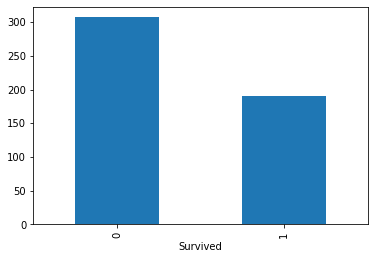

In [15]:
# Visualize the target var

train.survived.value_counts().plot(kind='bar')
plt.xlabel('Survived')

In [25]:
# Calculate the survived rate

survival_rate = train.survived.mean()
survival_rate

0.3822937625754527

**Notes**
1. Target var has two values: 0 and 1. 
2. We can compare our target variable to other categorical variables by treating the target as a number and calculating the average.

### 3-2. Exploring the target by other categorical varibales

- Other vars:
    - class (categorical)
    - sex (categorical)
    - embark_town (categorical)
    - alone (categorical)

### 3-2-a. Exploring categorical variables together and treating survived as a number

In [20]:
train.groupby('sex').survived.mean()

sex
female    0.748503
male      0.196970
Name: survived, dtype: float64

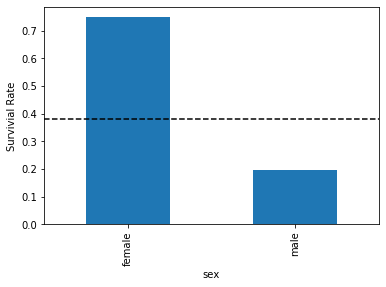

In [30]:
train.groupby('sex').survived.mean().plot.bar()
plt.ylabel('Survivial Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--')

In [31]:
train.groupby('class').survived.mean()

class
First     0.629032
Second    0.476636
Third     0.229323
Name: survived, dtype: float64

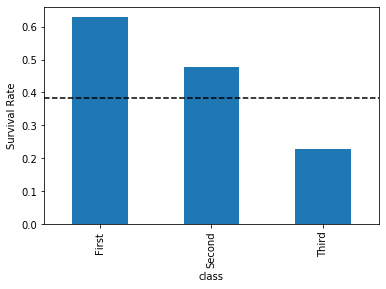

In [34]:
train.groupby('class').survived.mean().plot.bar()
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--')

In [35]:
train.groupby('embark_town').survived.mean()

embark_town
Cherbourg      0.500000
Queenstown     0.394737
Southampton    0.349862
Name: survived, dtype: float64

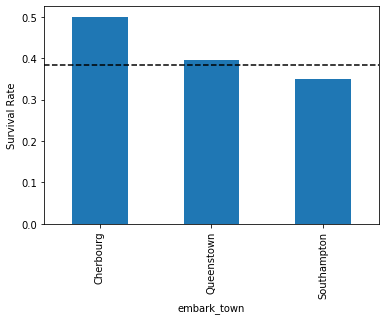

In [37]:
train.groupby('embark_town').survived.mean().plot(kind='bar')
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--')

In [50]:
list(enumerate(features))

[(0, 'sex'), (1, 'embark_town'), (2, 'class')]

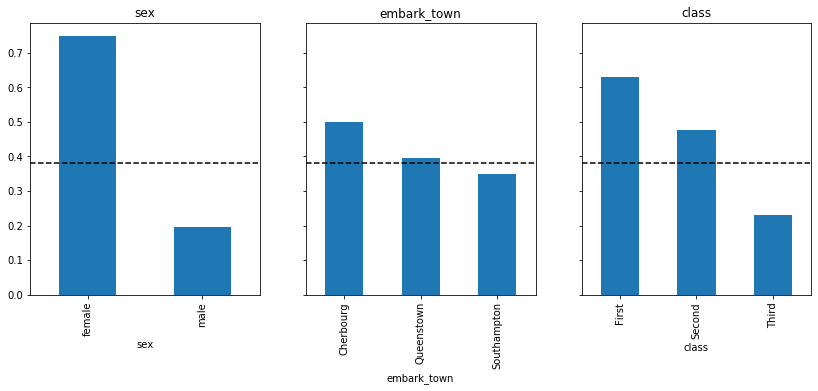

In [54]:
# Create a variable 'feature' to hold the three categorical variables
features = ['sex', 'embark_town', 'class']

fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

for i, feature in enumerate(features):
    train.groupby(feature).survived.mean().plot.bar(ax=axs[i])
    axs[i].set(title=feature)
    axs[i].hlines(survival_rate, *axs[i].get_xlim(), ls='--')

### 3-2-b. Exploring 2 categorical variables and now we're treating survived as a category, not a number

In [53]:
pd.crosstab(train.survived, train.sex)

sex,female,male
survived,,
0,42,265
1,125,65


In [58]:
pd.crosstab(train.survived, train.embark_town, margins=True, normalize=True)

embark_town,Cherbourg,Queenstown,Southampton,All
survived,,,,
0,0.096579,0.046278,0.474849,0.617706
1,0.096579,0.030181,0.255533,0.382294
All,0.193159,0.076459,0.730382,1.000000


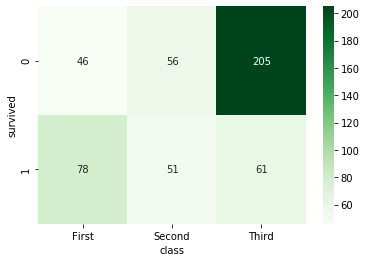

In [64]:
ctab = pd.crosstab(train.survived, train['class'])
sns.heatmap(ctab, cmap='Greens', annot=True, fmt=',')

### 3-2-c. Comparing 3 categorical variables

- where 1 is a boolean: survived
- other 2: sex, class
- We could use this same strategy to compare 2 categories and a continuous var too.

In [65]:
train.pivot_table('survived', 'sex', 'class')

class,First,Second,Third
sex,,,
female,0.960000,0.954545,0.479452
male,0.405405,0.142857,0.134715


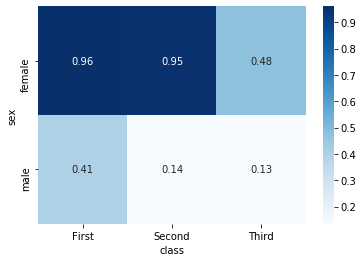

In [72]:
sns.heatmap(train.pivot_table('survived', 'sex', 'class'), cmap='Blues', annot=True)

In [70]:
train.groupby(['sex', 'class']).survived.mean()

sex     class 
female  First     0.960000
        Second    0.954545
        Third     0.479452
male    First     0.405405
        Second    0.142857
        Third     0.134715
Name: survived, dtype: float64

### 3-3. Explore target with cont. vars
1. one categorical: target var
2. one cont.
    - age
    - fare

In [73]:
train.groupby('survived').age.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,307.0,28.990228,12.847200,1.00,23.0,24.0,34.75,74.0
1,190.0,28.393421,14.451258,0.67,22.0,26.0,36.00,80.0


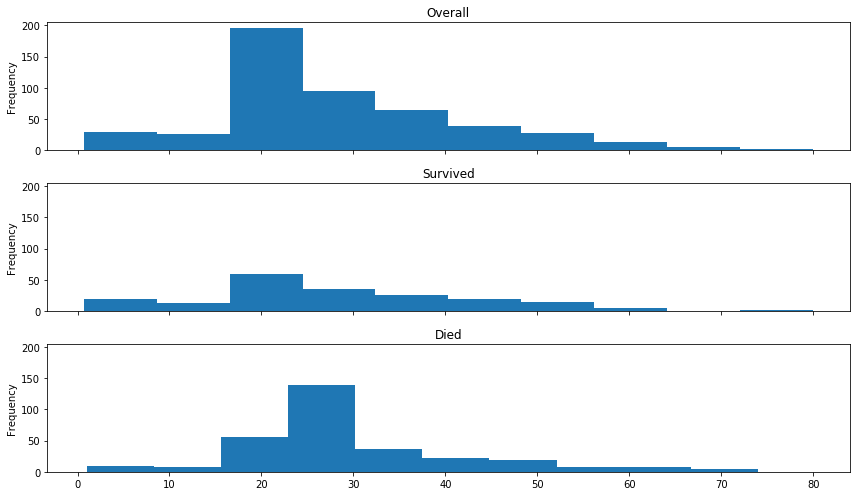

In [84]:
fig, axs = plt.subplots(3, 1, figsize=(12, 7), sharex=True, sharey=True)

train.age.plot.hist(ax=axs[0], title='Overall')
train[train.survived == 1].age.plot.hist(ax=axs[1], title='Survived')
train[train.survived == 0].age.plot.hist(ax=axs[2], title='Died')
fig.tight_layout()

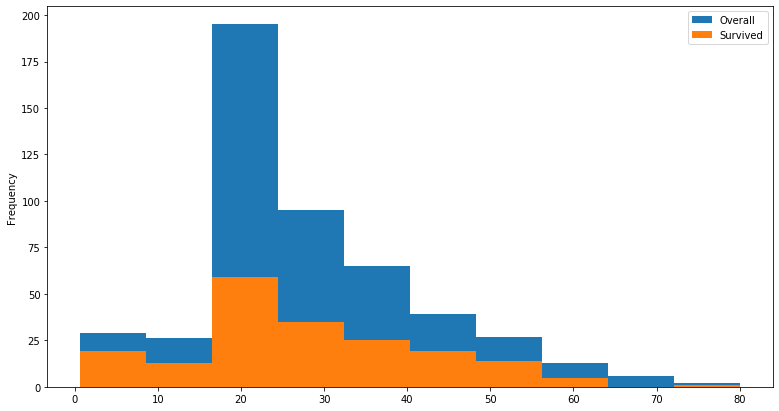

In [90]:
plt.figure(figsize=(13,7))

train.age.plot.hist(label='Overall')
train[train.survived == 1].age.plot.hist(label='Survived')
plt.legend()

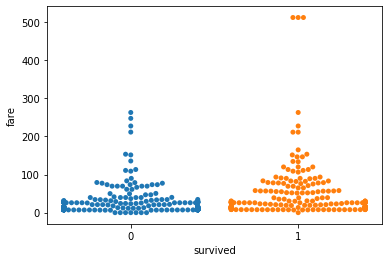

In [93]:
sns.swarmplot(data=train, y='fare', x='survived')

We can compare 1 continuous and 2 categorical variables with swarmplot as well

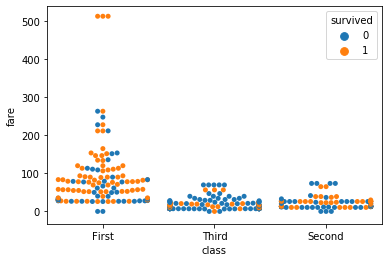

In [94]:
sns.swarmplot(data=train, y='fare', x='class', hue='survived')

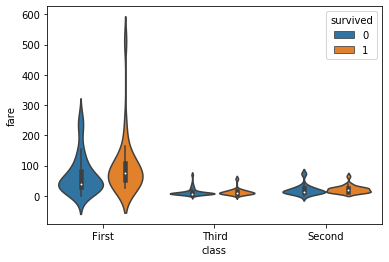

In [95]:
sns.violinplot(data=train, y='fare', x='class', hue='survived')

### Hypothesis Testing

What's the relationship between embark and fare?

In [96]:
train.groupby('embark_town').fare.var()

embark_town
Cherbourg      9329.043738
Queenstown      361.046238
Southampton    1238.029105
Name: fare, dtype: float64

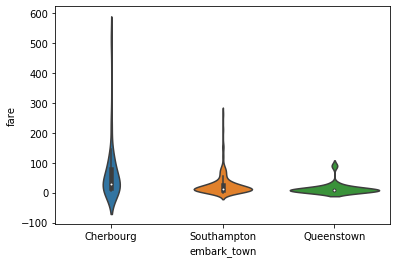

In [98]:
sns.violinplot(data=train, x='embark_town', y='fare')

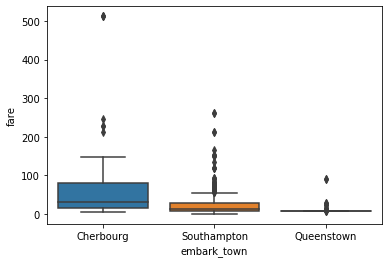

In [99]:
sns.boxplot(data=train, x='embark_town', y='fare')

- alpha = .05
- $H_0$: There is no difference in the fares paid by folks departing from cherbourg and everywhere else
- $H_a$: There is a significant difference in the fares paid in these 2 different groups

In [101]:
cherbourg_fares = train[train.embark_town == 'Cherbourg'].fare
rest_fares = train[train.embark_town != 'Cherbourg'].fare

t, p = stats.ttest_ind(cherbourg_fares, rest_fares)

t, p

(6.731961122818307, 4.6486096955571814e-11)

The hull hypothesis is rejected. 